<a href="https://colab.research.google.com/github/pi-mishra/Rossmann-Sales-Prediction-Regression-/blob/main/Rossmann_Sales_Prediction_(Piyush)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

**Table of content-**
1. Importing packages
2. EDA
3. Clean-up
4. Feature engineering
5. Pre processing
6. Model implimentation
7. Conclusion


# 1. Importing packages 

In [2]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. EDA

In [4]:
#reading the datasets

r_stores = pd.read_csv('/content/drive/MyDrive/Rossmann Sales prediction/Copy of Rossmann Stores Data.csv')

In [5]:
stores= pd.read_csv('/content/drive/MyDrive/Rossmann Sales prediction/Copy of store.csv')

In [6]:
r_stores.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
#mearging the 2 data sets

all_store = pd.merge(r_stores, stores, on ='Store')

In [9]:
all_store.shape

(1017209, 18)

In [10]:
all_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [11]:
all_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [12]:
#getting the unique value of dataframe
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [13]:
all_store.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64

In [14]:
for col in categorical_variables:
  print(f'Unique values for {col}: {all_store[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [15]:
round(all_store.describe(),1)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1017209.0,1014567.0,693861.0,693861.0,1017209.0,509178.0,509178.0
mean,558.4,4.0,5773.8,633.1,0.8,0.4,0.2,5430.1,7.2,2008.7,0.5,23.3,2011.8
std,321.9,2.0,3849.9,464.4,0.4,0.5,0.4,7715.3,3.2,6.0,0.5,14.1,1.7
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,1900.0,0.0,1.0,2009.0
25%,280.0,2.0,3727.0,405.0,1.0,0.0,0.0,710.0,4.0,2006.0,0.0,13.0,2011.0
50%,558.0,4.0,5744.0,609.0,1.0,0.0,0.0,2330.0,8.0,2010.0,1.0,22.0,2012.0
75%,838.0,6.0,7856.0,837.0,1.0,1.0,0.0,6890.0,10.0,2013.0,1.0,37.0,2013.0
max,1115.0,7.0,41551.0,7388.0,1.0,1.0,1.0,75860.0,12.0,2015.0,1.0,50.0,2015.0


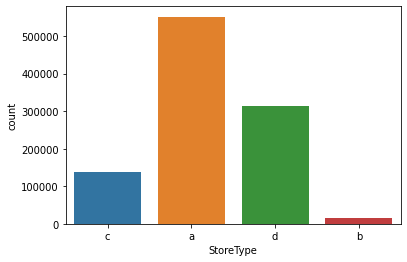

In [16]:
#Visual representation of count of store
sns.countplot(all_store['StoreType'])

In [17]:
#storetype and their count
all_store.StoreType.value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [18]:
#sales done by individual store
all_store.groupby(['StoreType'],as_index= False)['Sales'].sum()

,StoreType,Sales
0,a,3165334859
1,b,159231395
2,c,783221426
3,d,1765392943


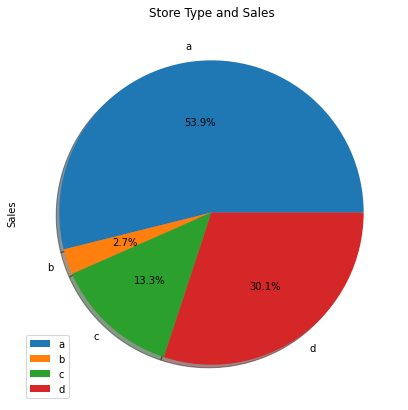

In [19]:
#store type and their sales percentage
all_store.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True, figsize=(7, 7))
plt.show()

Text(0, 0.5, 'Sales')

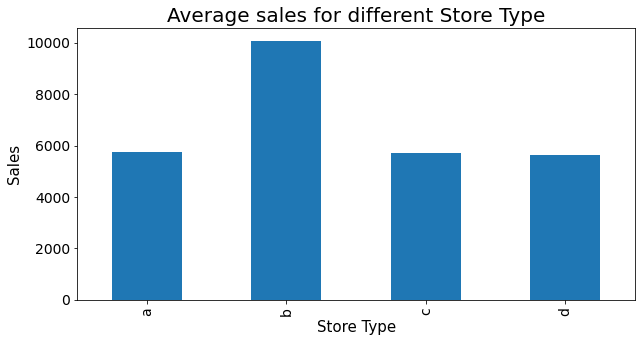

In [20]:
#Average sales done by differnt store
# Create the figure object 
ax = all_store.groupby(['StoreType'])['Sales'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average sales for different Store Type", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Store Type", fontsize = 15)
ax.set_ylabel("Sales", fontsize = 15)

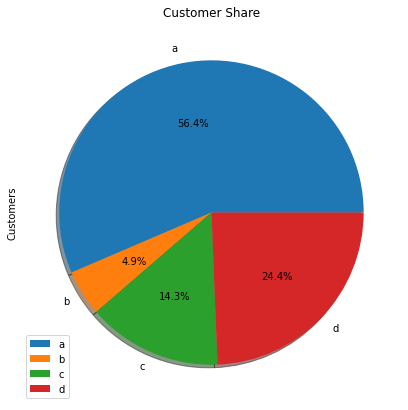

In [21]:
#Customers share percentage with respect to store
all_store.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True, figsize=(7, 7))
plt.show()

In [22]:
#sales done with respect to the promo
all_store.groupby(['DayOfWeek','Promo'],as_index= False)['Sales'].sum()

,DayOfWeek,Promo,Sales
0,1,0,375323829
1,1,1,754879183
2,2,0,382090703
3,2,1,638321227
4,3,0,368921884
5,3,1,586040979
6,4,0,347985910
7,4,1,563191799
8,5,0,421782843
9,5,1,558773098


Text(0, 0.5, 'Sales')

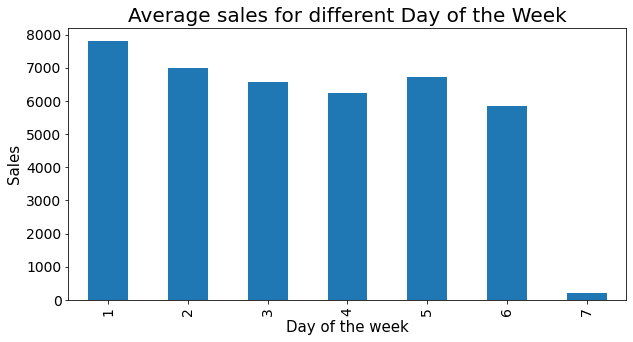

In [23]:
#Average sales for different days of the week

# Create the figure object 
ax = all_store.groupby(['DayOfWeek'])['Sales'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average sales for different Day of the Week", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Day of the week", fontsize = 15)
ax.set_ylabel("Sales", fontsize = 15)

In [26]:
all_store.groupby(['DayOfWeek'],as_index= False)['Sales'].sum()

,DayOfWeek,Sales
0,1,1130203012
1,2,1020411930
2,3,954962863
3,4,911177709
4,5,980555941
5,6,846317735
6,7,29551433


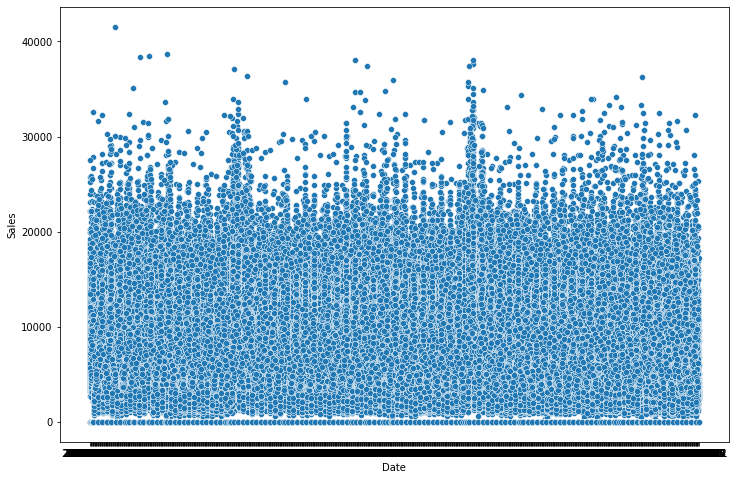

In [27]:
#sales with respect to date
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(x=all_store['Date'], y=all_store['Sales'])

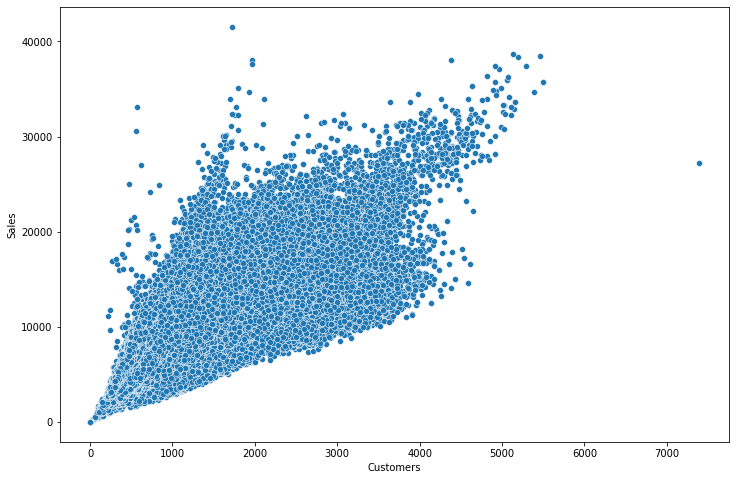

In [28]:
#sales with respect to customers

fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(x=all_store['Customers'], y=all_store['Sales'])

In [29]:
#Stores open with respect to days of week
all_store.groupby(['DayOfWeek'],as_index= False)['Open'].sum()

,DayOfWeek,Open
0,1,137560
1,2,143961
2,3,141936
3,4,134644
4,5,138640
5,6,144058
6,7,3593


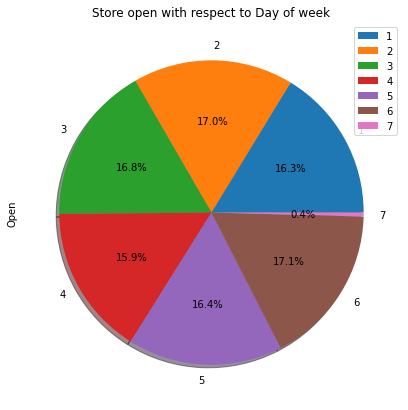

In [30]:
all_store.groupby("DayOfWeek")["Open"].sum().plot.pie(title='Store open with respect to Day of week', legend=True, autopct='%1.1f%%', shadow=True, figsize =(7, 7))
plt.show()

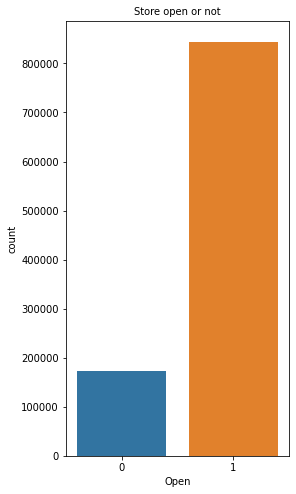

In [31]:
#graphical representation of store open or closed 
plt.figure(figsize = (4,8))
sns.countplot(data = all_store, x = 'Open')
plt.title('Store open or not', size=10)
plt.show()

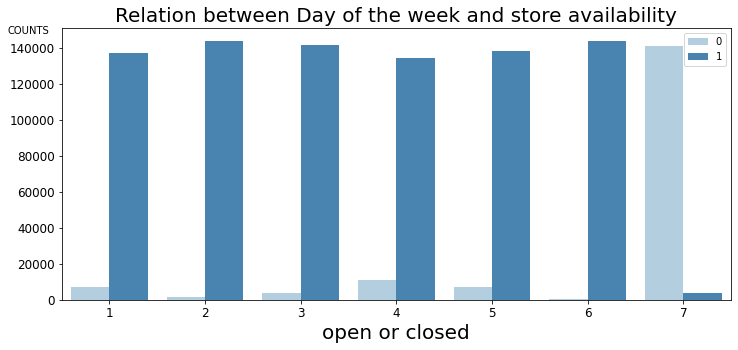

In [32]:
fig, axz = plt.subplots(figsize=(12,5))

axz = sns.countplot(x='DayOfWeek', hue='Open', data=all_store, palette='Blues')

axz.set_title('Relation between Day of the week and store availability', fontsize=20)
axz.set_ylabel('COUNTS', rotation=0, labelpad=50,size=10)
axz.set_xlabel('open or closed', size=20)
axz.yaxis.set_label_coords(-0.05, 0.97)  # (x, y)
axz.legend(loc=0,fontsize=10);

axz.tick_params(labelsize=12)

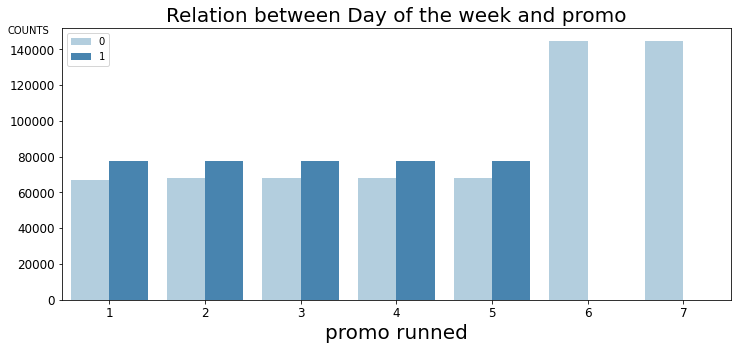

In [33]:
fig, axz = plt.subplots(figsize=(12,5))

axz = sns.countplot(x='DayOfWeek', hue='Promo', data=all_store, palette='Blues')

axz.set_title('Relation between Day of the week and promo', fontsize=20)
axz.set_ylabel('COUNTS', rotation=0, labelpad=50,size=10)
axz.set_xlabel('promo runned', size=20)
axz.yaxis.set_label_coords(-0.05, 0.97)  # (x, y)
axz.legend(loc=0,fontsize=10);

axz.tick_params(labelsize=12)

In [34]:
all_store.groupby(['Promo', 'DayOfWeek'],as_index= False)['Sales'].sum()

,Promo,DayOfWeek,Sales
0,0,1,375323829
1,0,2,382090703
2,0,3,368921884
3,0,4,347985910
4,0,5,421782843
5,0,6,846317735
6,0,7,29551433
7,1,1,754879183
8,1,2,638321227
9,1,3,586040979


Text(0, 0.5, 'Sales')

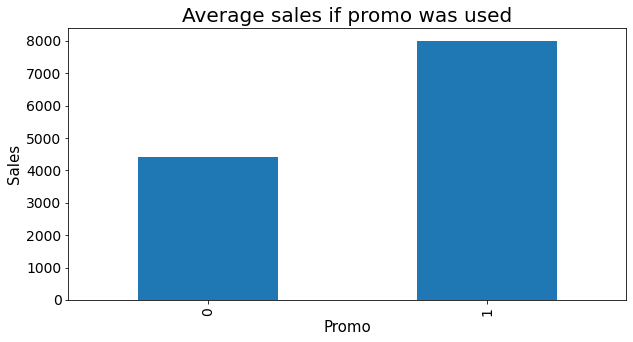

In [35]:
# Create the figure object 
ax = all_store.groupby(['Promo'])['Sales'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average sales if promo was used", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Promo", fontsize = 15)
ax.set_ylabel("Sales", fontsize = 15)

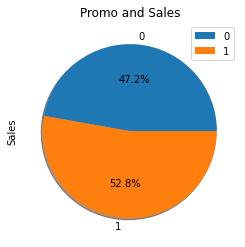

In [36]:
all_store.groupby("Promo")["Sales"].sum().plot.pie(title='Promo and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

In [37]:
all_store.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026413,-0.050746,-0.004592,0.008488,0.009865,0.038928
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000006,-0.000025,0.000168,0.000174,0.000049
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.019229,-0.028257,0.012659,-0.091040,0.059558,-0.021127
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102861,-0.030954,0.008931,-0.150159,0.040531,0.028974
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007992,0.001384,0.002771,-0.008309,-0.002430,0.001637
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000138,-0.000023,0.000152,-0.000983,-0.001008,-0.000283
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003689,-0.000526,0.001520,-0.006909,-0.003133,-0.003682
CompetitionDistance,-0.026413,-0.000025,-0.019229,-0.102861,0.007992,0.000138,-0.003689,1.000000,-0.061624,0.025397,-0.139886,-0.054384,-0.109695
CompetitionOpenSinceMonth,-0.050746,0.000006,-0.028257,-0.030954,0.001384,-0.000023,-0.000526,-0.061624,1.000000,-0.060594,-0.009383,-0.036251,0.050326
CompetitionOpenSinceYear,-0.004592,-0.000025,0.012659,0.008931,0.002771,0.000152,0.001520,0.025397,-0.060594,1.000000,-0.077336,-0.079784,0.012155


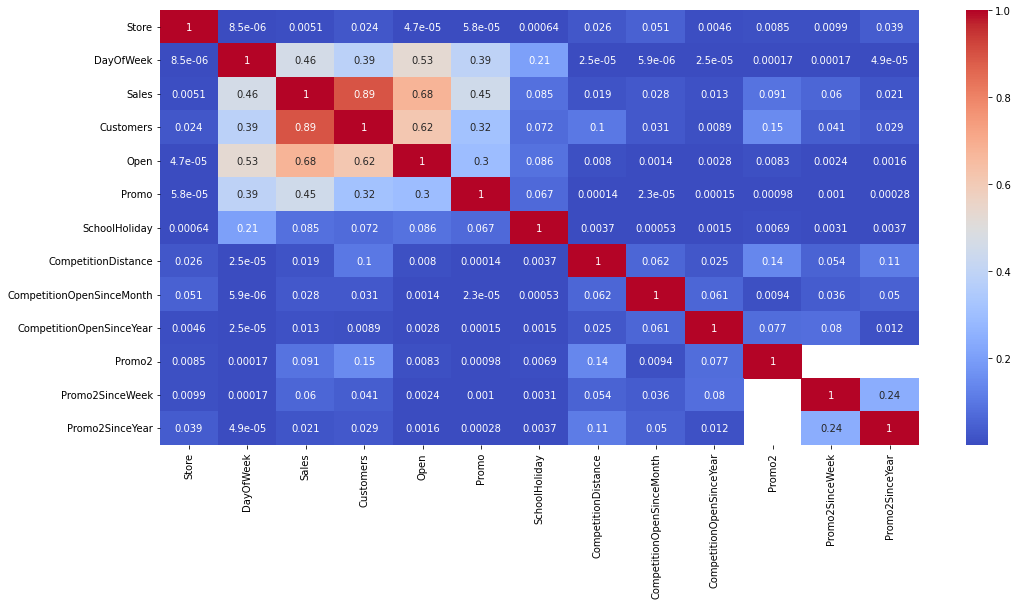

In [38]:
plt.figure(figsize=(17,8))
correlation=all_store.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

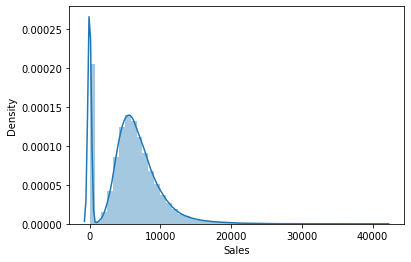

In [39]:
sns.distplot(all_store['Sales'])

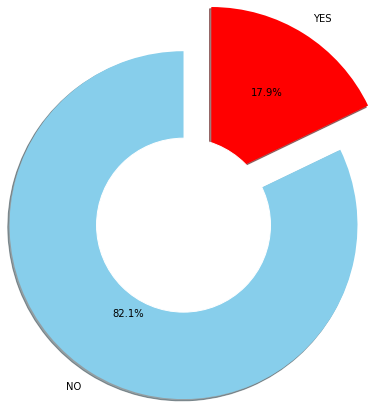

In [40]:
#graphical representation of School holiday 
data = all_store['SchoolHoliday'].value_counts()
explode = (0, 0.6)
plt.pie(data, explode = explode,autopct='%1.1f%%',startangle=90,shadow=True,radius = 2.0, labels = ['NO','YES'],colors=['skyblue','red'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.show()

Observation-


1.   There are 1017209 rows and 18 columns after combining the data frames. The 18 cloumns consist of 5 float , 8 integer and 5 object datatypes. Object data type will be changed into integer in the cleanup process.
2.   Store "a" has maximum number of stores followed by d,c and b. Same sequance is available for the sales. Hence we can conclude more store leads to more sales. Store "a" has 53.9% of total sales.
3.   Store "b" has done 2.7% of tatal sales still the average sales of store b is better than all the other stores. This means store b is performing better.
4.   Store "a" has the maximum share of customers this was expected as there  are maxmimum number of store a and they have the maximum number of sales.
5.   Whenever there was a promo ruunned the sales increased in that perticular day. Excluding saturday and sunday, there were no promo runned.
6.   Sales are decreasing with the each day passing by but there is a increase in sales on friday, it may be due the reason as weekend is about to start.
7.   Sales are increasing with respect to customers.
8.   Maximum number of stores are open on day 6 i.e. Saturday. And the maximum number of stores are closed on Sunday.
9.   Sales a right skewed distribution,this means that the mean is greater than the median.




# Clean-up

In [41]:
#converting date coloumn to datetime to extract year, month and day
all_store['Date']= pd.to_datetime(all_store['Date'])

In [42]:
all_store['year'] = pd.DatetimeIndex(all_store['Date']).year

all_store['month'] = pd.DatetimeIndex(all_store['Date']).month

all_store['day'] = pd.DatetimeIndex(all_store['Date']).day

In [43]:
all_store.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,30


In [44]:
#dropping date coloumn as we have extracted year , month and day
all_store.drop(['Date'], axis=1, inplace = True)

In [45]:
all_store.year.unique()

array([2015, 2014, 2013])

In [46]:
#sales over the years
sales_2013_df = all_store[all_store['year']== 2013]
sales_2014_df = all_store[all_store['year']== 2014]
sales_2015_df = all_store[all_store['year']== 2015]

In [47]:
#monthly sales
sales_2013 = sales_2013_df.groupby('month')['Sales'].sum().reset_index()
sales_2014 = sales_2014_df.groupby('month')['Sales'].sum().reset_index()
sales_2015 = sales_2015_df.groupby('month')['Sales'].sum().reset_index()

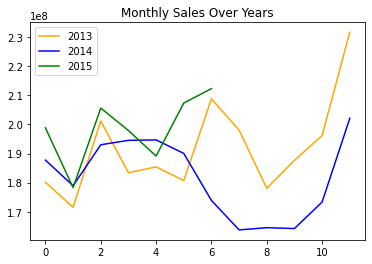

In [48]:
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

In [49]:
all_store.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
day                               0
dtype: int64

In [50]:
#percentage of null values
all_store.isnull().mean()

Store                        0.000000
DayOfWeek                    0.000000
Sales                        0.000000
Customers                    0.000000
Open                         0.000000
Promo                        0.000000
StateHoliday                 0.000000
SchoolHoliday                0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002597
CompetitionOpenSinceMonth    0.317878
CompetitionOpenSinceYear     0.317878
Promo2                       0.000000
Promo2SinceWeek              0.499436
Promo2SinceYear              0.499436
PromoInterval                0.499436
year                         0.000000
month                        0.000000
day                          0.000000
dtype: float64

In [51]:
#considering there is not competation in the null areas, so adding 0 to the null values
all_store['CompetitionDistance'] = all_store['CompetitionDistance'].fillna(0)


In [52]:
pd.isnull(all_store["CompetitionDistance"]).sum()

0

In [53]:
all_store['CompetitionOpenSinceMonth'] = all_store['CompetitionOpenSinceMonth'].fillna(all_store['CompetitionOpenSinceMonth'].mean())

In [54]:
all_store['CompetitionOpenSinceYear'] = all_store['CompetitionOpenSinceYear'].fillna(all_store['CompetitionOpenSinceYear'].mean())

In [55]:
#the cloumns in which promo2 was not done so their date and year is not available so filling the null values with 0
all_store['Promo2SinceWeek'] = all_store['Promo2SinceWeek'].fillna(0)
all_store['Promo2SinceYear'] = all_store['Promo2SinceYear'].fillna(0)
all_store['PromoInterval'] = all_store['PromoInterval'].fillna(0)


In [56]:
#checking if all the null values are filled
all_store.isnull().mean()

Store                        0.0
DayOfWeek                    0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
year                         0.0
month                        0.0
day                          0.0
dtype: float64

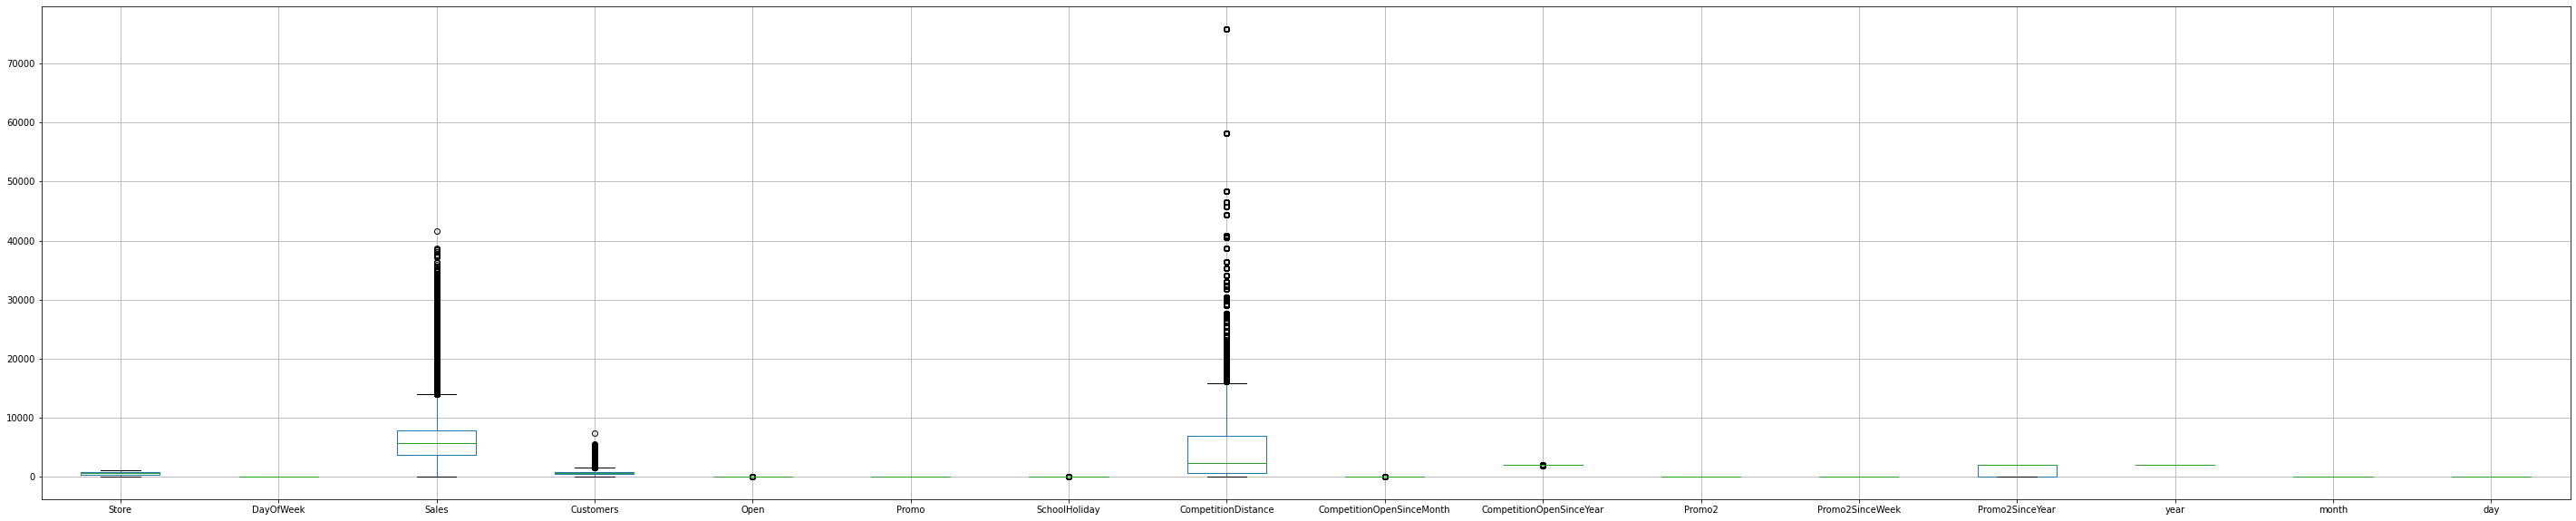

In [57]:
all_store.boxplot(figsize = (50,10))

We are not removing the outliers in the dataset as Sales, Customer and Competation distance can varry.

# Feature engineering

In [58]:
df = pd.get_dummies(all_store, columns= ['StoreType','Assortment','StateHoliday','PromoInterval'],drop_first = True)

In [59]:
df.dtypes

Store                               int64
DayOfWeek                           int64
Sales                               int64
Customers                           int64
Open                                int64
Promo                               int64
SchoolHoliday                       int64
CompetitionDistance               float64
CompetitionOpenSinceMonth         float64
CompetitionOpenSinceYear          float64
Promo2                              int64
Promo2SinceWeek                   float64
Promo2SinceYear                   float64
year                                int64
month                               int64
day                                 int64
StoreType_b                         uint8
StoreType_c                         uint8
StoreType_d                         uint8
Assortment_b                        uint8
Assortment_c                        uint8
StateHoliday_0                      uint8
StateHoliday_a                      uint8
StateHoliday_b                    

# Training Data

In [60]:
#defining x and y axis
x= df.drop(['Sales'],axis=1).values

In [61]:
y= df['Sales'].values

In [62]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size= 0.30, random_state=42)

# Model implimentation



##Linear regression

In [63]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [64]:
reg.score(x_train, y_train)

0.9011254737951733

In [65]:
y_pred = reg.predict(x_test)

In [66]:
from sklearn.metrics import r2_score

In [67]:
x_test.shape

(305163, 27)

In [68]:
r2_score= r2_score(y_pred,y_test)
print("r2_score:",r2_score)

r2_score: 0.8906071641042006


In [69]:
#1-(1-r2_score)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))
adjusted_r2_score = 1-((1-r2_score)*(305163-1)/(305163-1-27))
print("adjusted_r2_score:",adjusted_r2_score)

adjusted_r2_score: 0.8905974844326808


##Ridge regression

In [70]:
from sklearn.linear_model import Ridge, Lasso

In [71]:
ridge = Ridge(alpha = 0.1, max_iter = 2000)

In [72]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1, max_iter=2000)

In [73]:
prediction_ridge = ridge.predict(x_test)

In [74]:
x_test.shape

(305163, 27)

In [75]:
from sklearn.metrics import r2_score

In [76]:
r2_score =r2_score(prediction_ridge,y_test)
print("r2_score:",r2_score)

r2_score: 0.8905836429844358


In [77]:
adjusted_r2_score = 1-(1-r2_score)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted_r2_score:",adjusted_r2_score)

adjusted_r2_score: 0.8905739612316398


## Lasso regression

In [78]:
lass = Lasso(alpha = 0.1, max_iter = 2000)

In [79]:
lass.fit(x_train,y_train)

Lasso(alpha=0.1, max_iter=2000)

In [80]:
prediction_lasso = lass.predict(x_test)

In [81]:
from sklearn.metrics import r2_score

In [82]:
r2_score = r2_score(y_test,prediction_lasso)
print("r2_score:",r2_score)

r2_score: 0.9010012224389329


In [83]:
adjusted_r2_score = 1-(1-r2_score)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted_r2_score:",adjusted_r2_score)

adjusted_r2_score: 0.9009924624900769


##Decision Tree

In [84]:
from sklearn.tree import DecisionTreeRegressor


In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
des_regressor = DecisionTreeRegressor(random_state=10)
cross_val_score(des_regressor, x_train, y_train, cv=10).mean()

0.9721355081663242

In [87]:
des_regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=10)

In [88]:
y_pred_des = des_regressor.predict(x_test)

In [89]:
from sklearn.metrics import r2_score

In [90]:
r2_score= r2_score(y_pred_des, y_test)
print("r2_score:",r2_score)

r2_score: 0.9716791293212919


In [91]:
adjusted_r2_score = 1-(1-r2_score)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted_r2_score:",adjusted_r2_score)

adjusted_r2_score: 0.9716766233370281


# Conclusion

Descision tree outperformed other regression models.

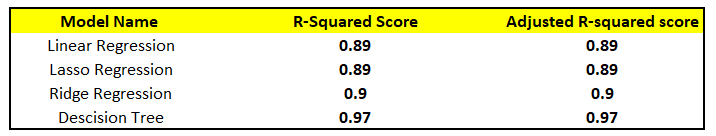
